In [13]:
%reload_ext autoreload
%autoreload 2

import os
import sys

import h5py
import numpy as np

import py21cmfast as p21c

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)
from scripts.step_size import *
from analysis.limits import get_limits

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file(f"{WDIR}/matplotlibrc")

In [ ]:
! ls /n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/outputs

In [7]:
outputs_dir = "/n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/outputs"

# mass_i = 0
# masses = np.logspace(1.5, 12, 22)
# log_lifetimes = np.array([
#     29.393, 29.202, 29.012, 28.821, 28.631, 28.440, 28.250, 28.059, 27.868, 27.678, 27.487,
#     27.297, 27.106, 26.916, 26.725, 26.535, 26.344, 26.153, 25.963, 25.772, 25.582, 25.391
# ])
# mass = masses[mass_i]
# log_lifetime = log_lifetimes[mass_i]
# print(mass)
# print(log_lifetime)

bkg_fn = f"{outputs_dir}/bkg/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_fid_r54321.h5"
fid_fn = f"{outputs_dir}/pbh-acc-PRc23-test/log10m2.000/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_1_r54321.h5"
# part1_fn = f"{outputs_dir}/decay/phot_hom/log10m3.0/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_1_r54321.h5"

In [8]:
with h5py.File(bkg_fn, 'r') as hf:
    lcfield_bkg = hf['lightcones']['brightness_temp'][()]
with h5py.File(fid_fn, 'r') as hf:
    lcfield_fid = hf['lightcones']['brightness_temp'][()]
# with h5py.File(hom_fn, 'r') as hf:
#     lcfield_hom = hf['lightcones']['brightness_temp'][()]
lc_bkg = p21c.LightCone.read(bkg_fn)
z_s = lc_bkg.lightcone_redshifts

step_size  f = 1.778e-04
limit_size f = 1.258e-02
limit_size / step_size = 70.755


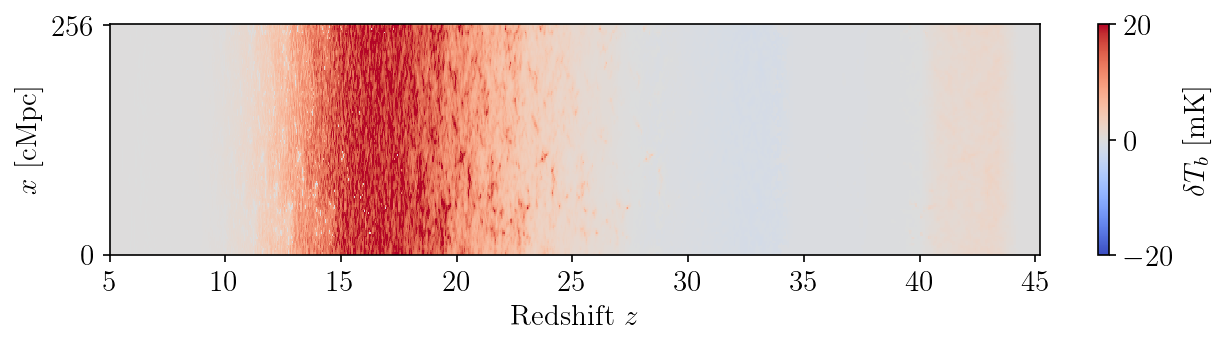

In [26]:
fb = lcfield_bkg[:, 0, :]
f0 = lcfield_fid[:, 0, :]

m = 1e2 # [Msun] for pbh-acc
step_size = pbh_acc_f(m, 'PRc23')
limit_size = get_limits(m, 'pbh-acc-PRc23-test')
print(f"step_size  f = {step_size:.3e}")
print(f"limit_size f = {limit_size:.3e}")
mult = limit_size / step_size
print(f"limit_size / step_size = {mult:.3f}")

fig, ax = plt.subplots(figsize=(10, 2))
im = ax.pcolormesh(z_s, np.linspace(0, 256, 128), (f0-fb) * mult, cmap='coolwarm', vmax=20, vmin=-20)
ax.set(yticks=[0, 256], yticklabels=[0, 256])
ax.set(xlabel=r'Redshift $z$', ylabel='$x$ [cMpc]')
cbar = fig.colorbar(im)
cbar.set_label(r'$\delta T_b$ [mK]')